**Imports**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import saraRC1 as sara

In [2]:
def plot_heatmap(im, grid_size, name=None):
    '''
    Given an image im, this function plots the heatmap generated by SaRa for the given grid size.
    '''

    heatmap, _ = sara.return_sara(cv2.imread(im), grid_size)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    plt.rcParams['figure.figsize'] = [12, 6]
    plt.figure(name + ' SaRa Output - Grid Size ' +
               str(grid_size) + ' x ' + str(grid_size))
    plt.gcf().set_size_inches(12, 6)
    plt.imshow(heatmap)
    plt.xticks([])
    plt.yticks([])
    plt.title('SaRa Output - Grid Size ' +
              str(grid_size) + ' x ' + str(grid_size))


In [3]:
def plot_score_vs_grid_size(scores, name=None, do='score'):
    '''
    Given a dictionary of scores, this function plots the average score vs grid size.
    '''

    plt.figure(name + ' Average Score vs Grid Size (Logarithmic Scale)')
    for seg_dim in scores.keys():
        plt.plot(seg_dim, scores[seg_dim][1], 'bo')
        if seg_dim > 5:
            plt.plot([seg_dim - 1, seg_dim], [scores[seg_dim - 1][1], scores[seg_dim][1]], 'k-')
        plt.grid(True)

    plt.xlabel('Grid Size')
    plt.ylabel('Average Score (Top 25% Segments)')
    plt.title('Average Score vs Grid Size (Logarithmic Scale)')
    plt.yscale('log')

    plt.gcf().set_size_inches(12, 6)
    plt.show()


In [4]:
def display_top_4_grids(scores, name):
    '''
    Given a dictionary of scores, this function plots the top 4 grids which maximise average score.
    '''

    plt.figure(name + ' SaRa Output - Top 4 Grid Sizes')
    plt.gcf().set_size_inches(12, 6)

    for i in range(4):
        plt.subplot(2, 2, i + 1)
        im = cv2.imread(scores[i][1][3])
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        plt.imshow(im)
        plt.xticks([])
        plt.yticks([])
        plt.title(str(scores[i][1][0]) +
                  ' x ' + str(scores[i][1][0]))
    

**Experiment 1** – Average Entropy Maximisation

In [5]:
def maximise_entropy(im, name, n):
    '''
    Given an image im, this function returns the grid size that maximises the average score of the top n segments generated by SaRa.
    '''

    scores = {}
    s1 = cv2.imread(im)

    # All grid sizes
    plt.figure(name + ' SaRa Output - All Grid Sizes')
    plt.gcf().set_size_inches(12, 6)

    for seg_dim in range(5, n):
        heatmap, sara_list = sara.return_sara(s1.copy(), seg_dim)
        heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

        # Plot heatmap of grid size i x i
        plt.subplot(4, 5, seg_dim - 4)
        plt.imshow(heatmap)
        plt.xticks([])
        plt.yticks([])
        plt.title(str(seg_dim) + ' x ' + str(seg_dim))

        # Output heatmap to file
        path = './output/' + name + \
            ' (' + str(seg_dim) + 'x' + str(seg_dim) + ').png'
        # heatmap = cv2.cvtColor(heatmap, cv2.COLOR_RGB2BGR)
        # cv2.imwrite(path, heatmap)
        # print(f'Image saved to {path}')

        # Average entropy of the top 25% grid segments
        top = seg_dim * seg_dim // 4
        average = sum(sara_list[0:top][2]) / len(sara_list[0:top][2])
        scores[seg_dim] = (seg_dim, average, sara_list, path)

        sara.reset()

    scores_sorted = scores.copy()
    scores_sorted = sorted(scores_sorted.items(),
                              key=lambda x: x[1][1], reverse=True)

    return scores, scores_sorted


In [7]:
n = 25

path = '../images/'
name_a = 'groupatest.png'
name_b = 'groupbtest.png'

im_a = path + name_a
img_a = cv2.imread(im_a)
# img_a = cv2.resize(img_a, (0, 0), fx=0.3, fy=0.3)

im_b = path + name_b
img_b = cv2.imread(im_b)
# img_b = cv2.resize(img_b, (0, 0), fx=0.3, fy=0.3)

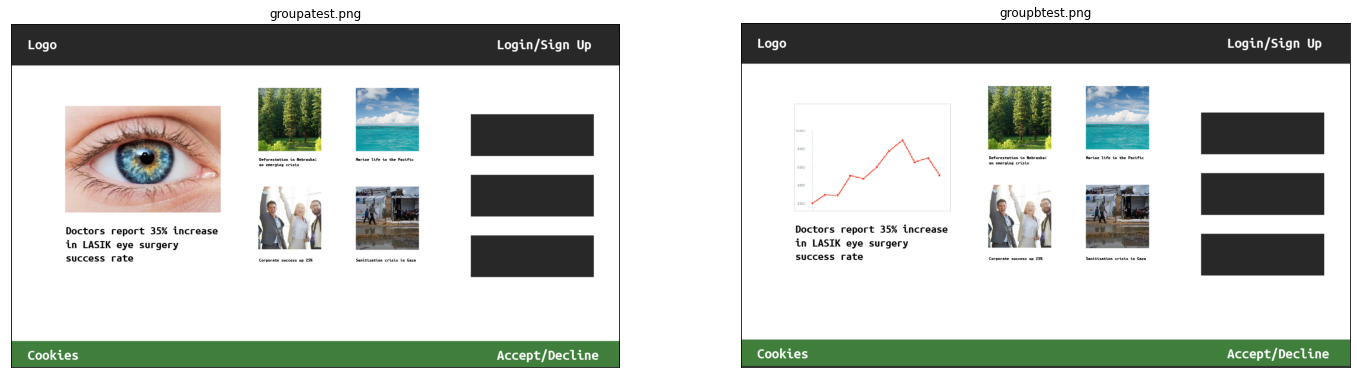

In [11]:
plt.figure(figsize=(24, 12))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img_a, cv2.COLOR_BGR2RGB))
plt.title(name_a)
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(cv2.cvtColor(img_b, cv2.COLOR_BGR2RGB))
plt.title(name_b)
plt.xticks([])
plt.yticks([])

plt.show()

In [12]:
saliency_map_a = sara.return_saliency(img_a, generator='deepgaze')
saliency_map_b = sara.return_saliency(img_b, generator='deepgaze')

Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\matth/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\matth/.cache\torch\hub\pytorch_vision_v0.6.0
c:\Programming\Assignments\ICT3909 Final Year Project in Artificial Intelligence\ICT3909\saliency-ranking\saraRC1.py:116: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)


Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\matth/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\matth/.cache\torch\hub\pytorch_vision_v0.6.0


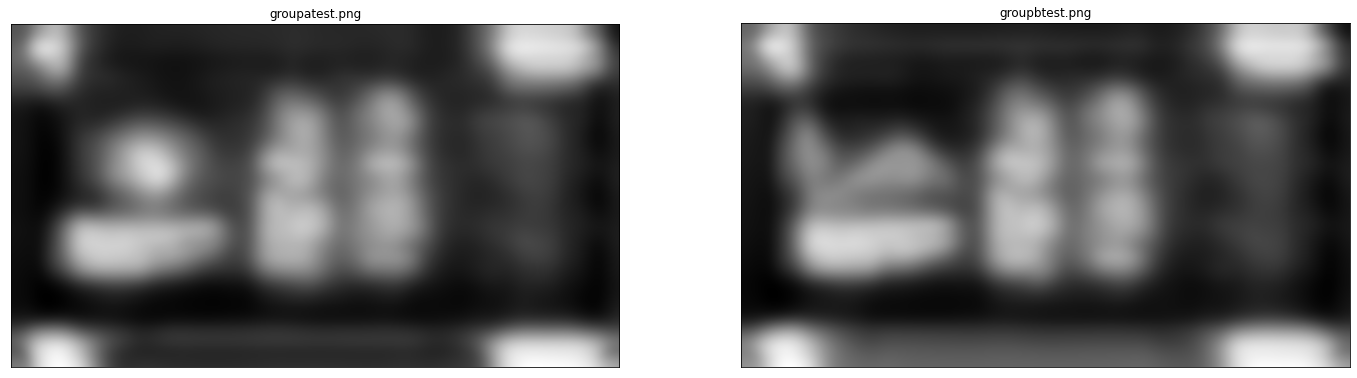

In [13]:
plt.figure(figsize=(24, 12))
plt.subplot(121)
plt.imshow(cv2.cvtColor(saliency_map_a, cv2.COLOR_BGR2RGB))
plt.title(name_a)
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(cv2.cvtColor(saliency_map_b, cv2.COLOR_BGR2RGB))
plt.title(name_b)
plt.xticks([])
plt.yticks([])

plt.show()

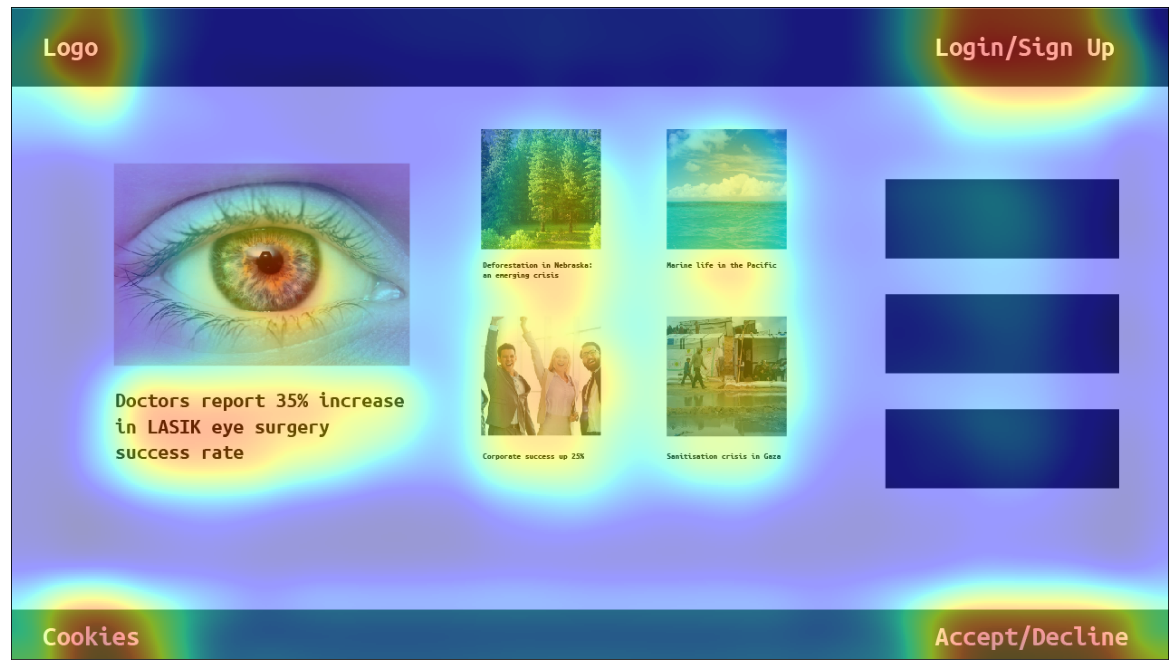

In [14]:
plt.figure(figsize=(24, 12))
plt.imshow(cv2.cvtColor(img_a, cv2.COLOR_BGR2RGB))
plt.imshow(saliency_map_a, alpha=0.4, cmap='jet')
plt.xticks([]), plt.yticks([])
plt.show()

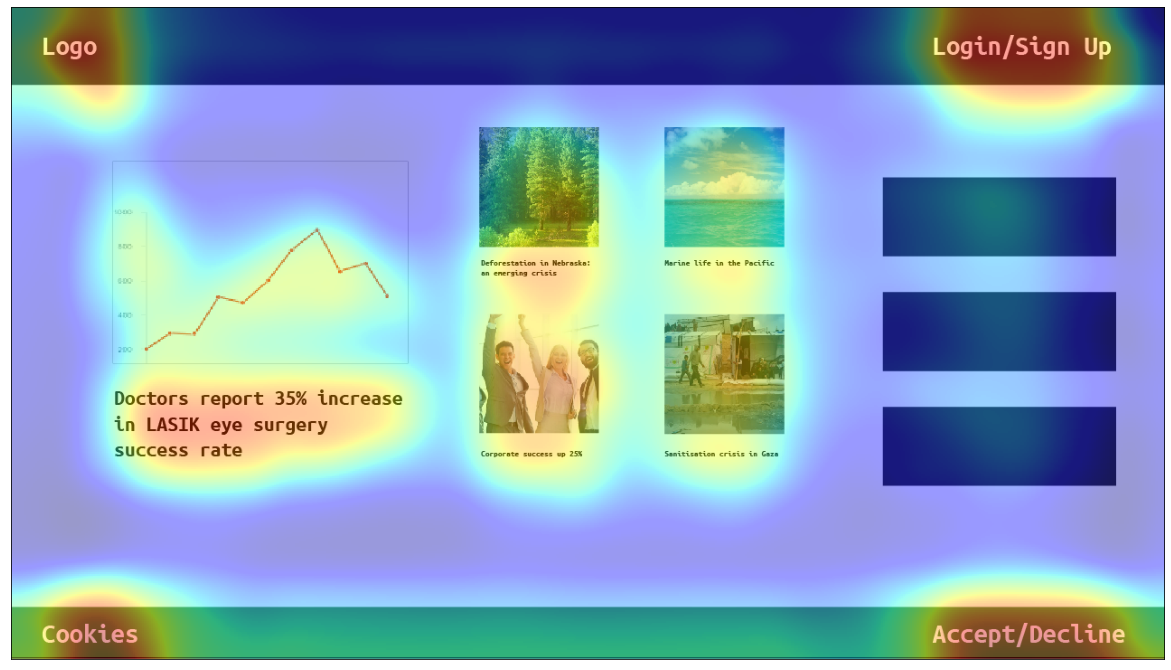

In [15]:
plt.figure(figsize=(24, 12))
plt.imshow(cv2.cvtColor(img_b, cv2.COLOR_BGR2RGB))
plt.imshow(saliency_map_b, alpha=0.4, cmap='jet')
plt.xticks([]), plt.yticks([])
plt.show()

In [28]:
GRID_SIZE = 9 
sara.WEIGHTS = (1, 1, 1, 1)
im_bigger_a = img_a.copy()
sara_heatmap_a, sara_list_a = sara.return_sara(img_a.copy(), GRID_SIZE, saliency_map=saliency_map_a)
sara_heatmap_a = cv2.cvtColor(sara_heatmap_a, cv2.COLOR_BGR2RGB)
sara.reset()

In [29]:
GRID_SIZE = 9 
sara.WEIGHTS = (1, 1, 1, 1)
im_bigger_b = img_b.copy()
sara_heatmap_b, sara_list_b = sara.return_sara(img_b.copy(), GRID_SIZE, saliency_map=saliency_map_b)
sara_heatmap_b = cv2.cvtColor(sara_heatmap_b, cv2.COLOR_BGR2RGB)
sara.reset()

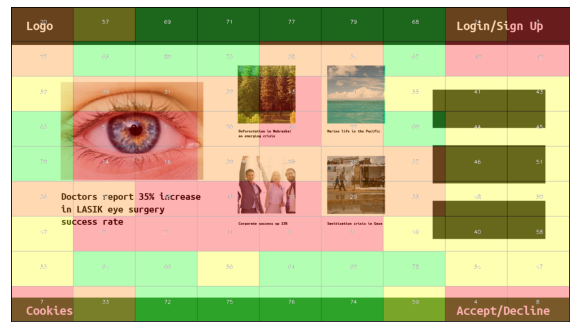

In [26]:
plt.figure(figsize=(10, 10))
plt.imshow(sara_heatmap_a)
plt.xticks([]), plt.yticks([])
plt.show()

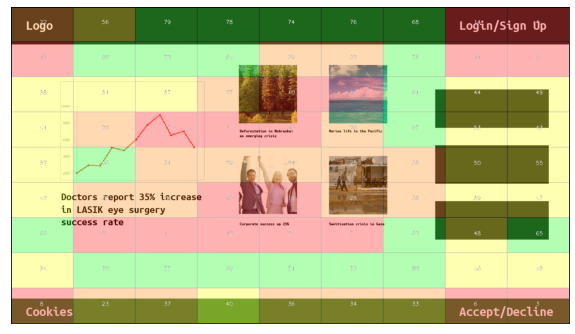

In [30]:
plt.figure(figsize=(10, 10))
plt.imshow(sara_heatmap_b)
plt.xticks([]), plt.yticks([])
plt.show()

In [72]:
[i[0] for i in sara_list_b]

[55,
 56,
 58,
 80,
 8,
 30,
 79,
 59,
 72,
 17,
 22,
 16,
 57,
 48,
 7,
 9,
 31,
 29,
 49,
 23,
 28,
 40,
 0,
 73,
 47,
 41,
 32,
 21,
 50,
 39,
 46,
 38,
 14,
 78,
 77,
 42,
 76,
 74,
 51,
 13,
 75,
 27,
 45,
 35,
 25,
 71,
 70,
 53,
 61,
 26,
 43,
 19,
 36,
 34,
 63,
 44,
 1,
 20,
 18,
 52,
 10,
 24,
 60,
 54,
 12,
 62,
 37,
 33,
 6,
 66,
 64,
 67,
 11,
 68,
 4,
 15,
 5,
 65,
 3,
 2,
 69]

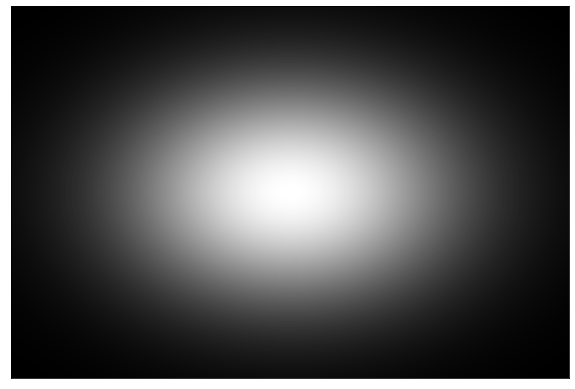

In [92]:
# Create a 512x512 image of agaussian kernel
kernel = cv2.getGaussianKernel(512, 106)
kernel = kernel * kernel.T
# Stretch to 1024 x 512
kernel = cv2.resize(kernel, (0, 0), fx=1.5, fy=1)

plt.figure(figsize=(10, 10))
plt.imshow(kernel, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [31]:
def index_to_coordinates(index, seg_dim, im_size):
    '''
    Given an index and a shape, this function returns the corresponding coordinates.
    '''

    x1 = int((index % seg_dim) * (im_size[1] / seg_dim))
    y1 = int((index // seg_dim) * (im_size[0] / seg_dim))

    x2 = int(x1 + (im_size[1] / seg_dim))
    y2 = int(y1 + (im_size[0] / seg_dim))
    
    return (x1, y1, x2, y2)

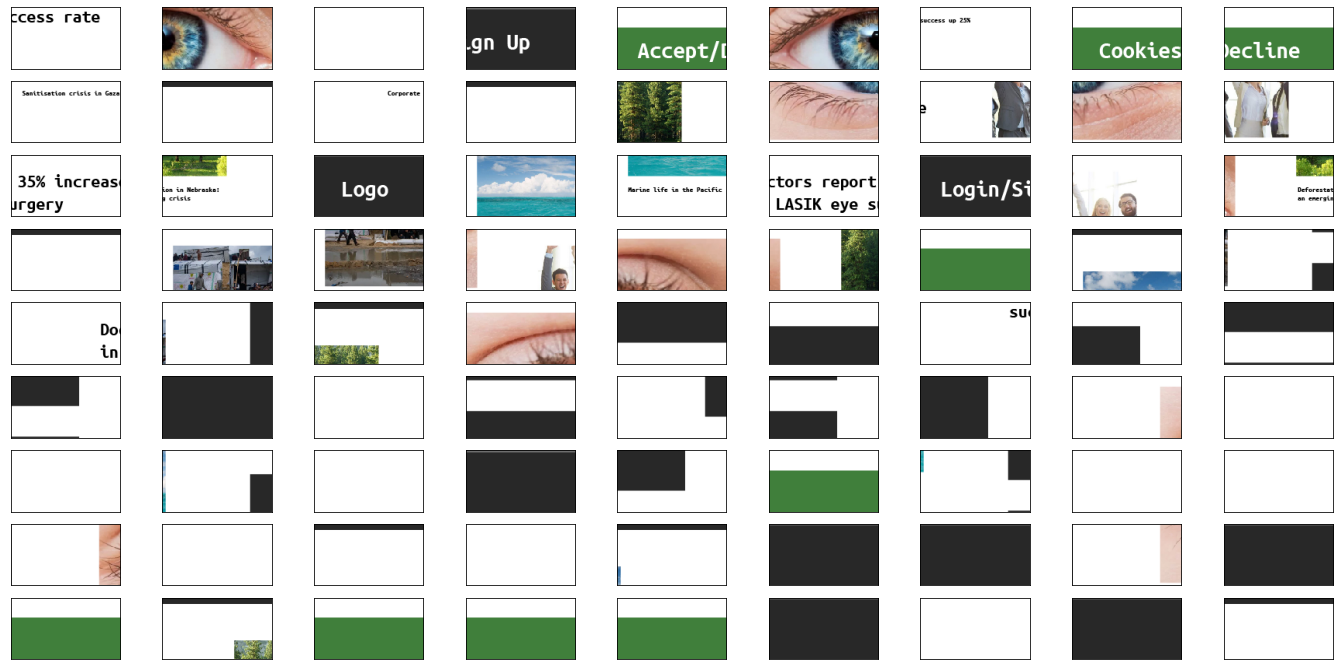

In [34]:
sara_list_sorted = sorted(sara_list_a, key=lambda x: x[1])

image_segments = []

for segment in sara_list_sorted:
    image_crop = img_a.copy()
    coordinates = index_to_coordinates(segment[0], GRID_SIZE, img_a.shape)
    image_crop = image_crop[coordinates[1]:coordinates[3], coordinates[0]:coordinates[2]]

    image_segments.append(image_crop)

plt.figure(figsize=(24, 12))
for i in range(GRID_SIZE * GRID_SIZE):
    plt.subplot(GRID_SIZE, GRID_SIZE, i + 1)
    plt.imshow(cv2.cvtColor(image_segments[i], cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])

plt.show()


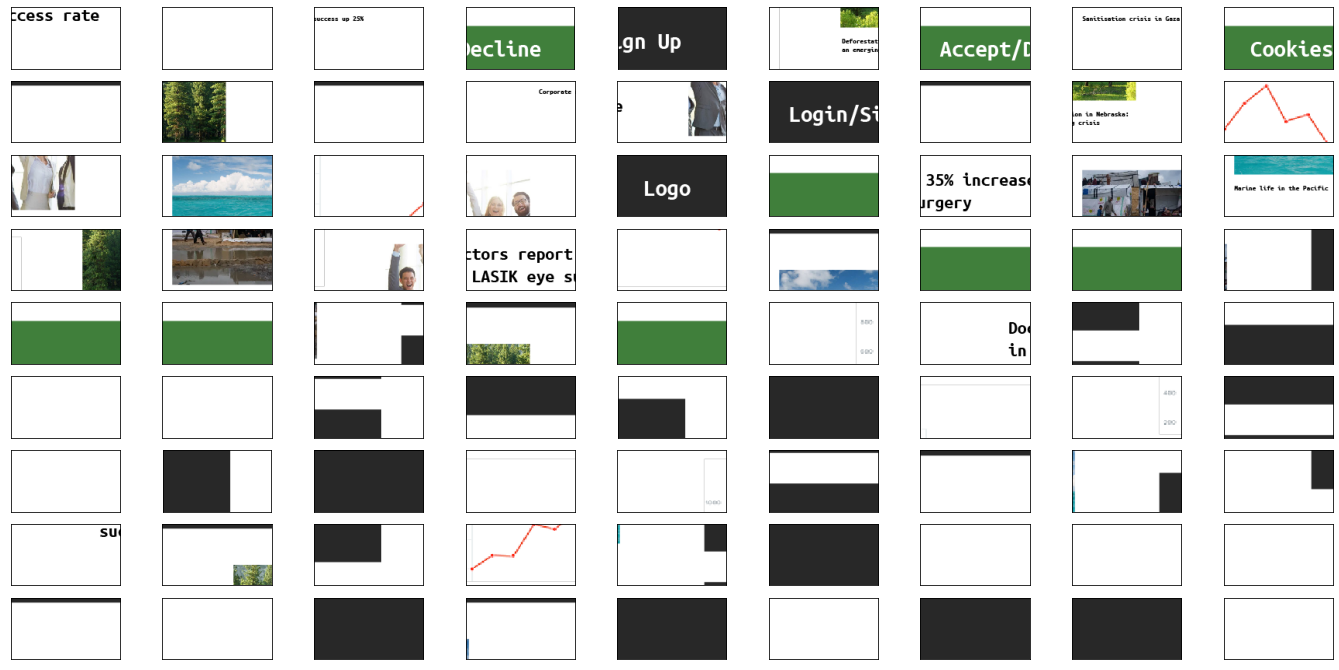

In [35]:
sara_list_sorted = sorted(sara_list_b, key=lambda x: x[1])

image_segments = []

for segment in sara_list_sorted:
    image_crop = img_b.copy()
    coordinates = index_to_coordinates(segment[0], GRID_SIZE, img_a.shape)
    image_crop = image_crop[coordinates[1]:coordinates[3], coordinates[0]:coordinates[2]]

    image_segments.append(image_crop)

plt.figure(figsize=(24, 12))
for i in range(GRID_SIZE * GRID_SIZE):
    plt.subplot(GRID_SIZE, GRID_SIZE, i + 1)
    plt.imshow(cv2.cvtColor(image_segments[i], cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])

plt.show()


In [ ]:
sara_list_sorted = sorted(sara_list, key=lambda x: x[1])

image_segments = []

for segment in sara_list_sorted:
    image_crop = img_b.copy()
    coordinates = index_to_coordinates(segment[0], GRID_SIZE, img_a.shape)
    image_crop = image_crop[coordinates[1]:coordinates[3], coordinates[0]:coordinates[2]]

    image_segments.append(image_crop)

plt.figure(figsize=(24, 12))
for i in range(GRID_SIZE * GRID_SIZE):
    plt.subplot(GRID_SIZE, GRID_SIZE, i + 1)
    plt.imshow(cv2.cvtColor(image_segments[i], cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])

plt.show()


In [55]:
for i, j in zip(sara_list_a, sara_list_b):
    print(i[0], j[0], i[0] - j[0])

55 55 0
29 56 -27
56 58 -2
8 80 -72
79 8 71
28 30 -2
58 79 -21
72 59 13
80 72 8
59 17 42
16 22 -6
57 16 41
17 57 -40
22 48 -26
37 7 30
48 9 39
38 31 7
49 29 20
47 49 -2
31 23 8
0 28 -28
23 40 -17
32 0 32
46 73 -27
7 47 -40
40 41 -1
30 32 -2
9 21 -12
41 50 -9
50 39 11
39 46 -7
20 38 -18
21 14 7
73 78 -5
14 77 -63
51 42 9
45 76 -31
42 74 -32
13 51 -38
19 13 6
61 75 -14
25 27 -2
54 45 9
26 35 -9
34 25 9
35 71 -36
43 70 -27
71 53 18
52 61 -9
60 26 34
53 43 10
44 19 25
18 36 -18
63 34 29
70 63 7
24 44 -20
66 1 65
1 20 -19
62 18 44
78 52 26
33 10 23
67 24 43
68 60 8
27 54 -27
64 12 52
10 62 -52
65 37 28
15 33 -18
6 6 0
2 66 -64
36 64 -28
3 67 -64
74 11 63
12 68 -56
77 4 73
75 15 60
76 5 71
4 65 -61
69 3 66
5 2 3
11 69 -58


c:\Users\matth\anaconda3\envs\coco\lib\site-packages\ipykernel_launcher.py:31: UserWarning: set_ticks() must have been called.


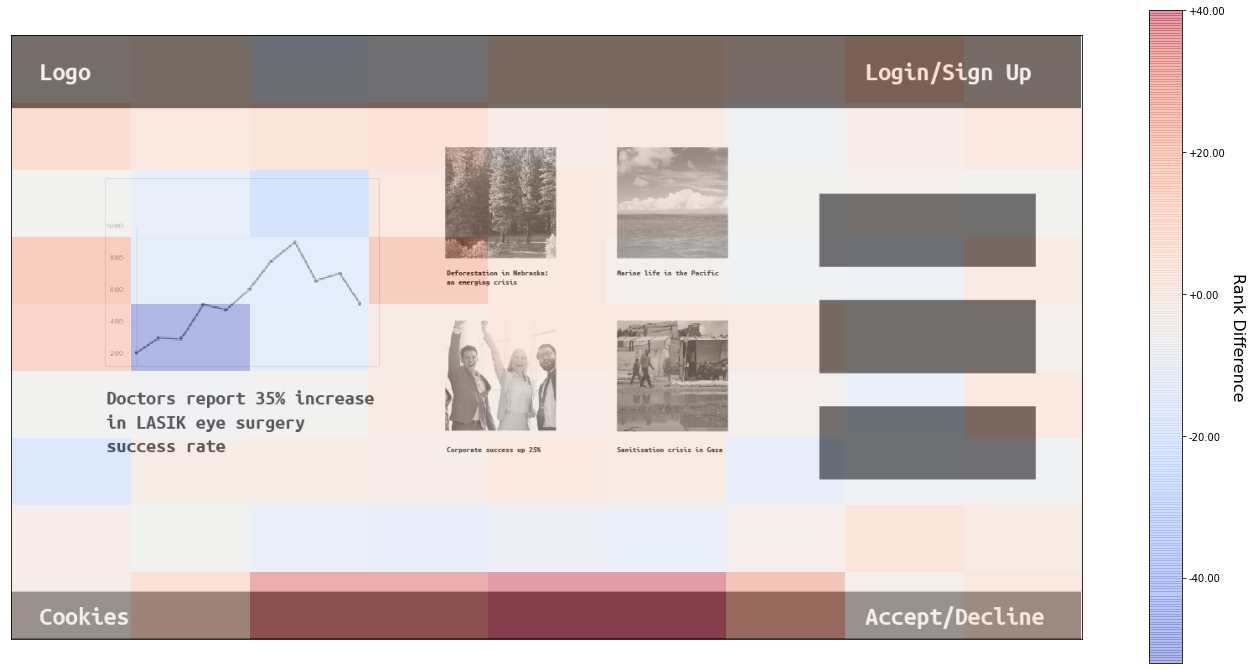

In [106]:
# Calculate the difference in ranks between sara_list_a and sara_list_b, create a heatmap of the differences - each list is sorted by rank, index 0 = index in grid, index 1 = rank
diff = np.zeros((GRID_SIZE, GRID_SIZE))

sara_list_a_sorted = sorted(sara_list_a, key=lambda x: x[0])
sara_list_b_sorted = sorted(sara_list_b, key=lambda x: x[0])

for i in range(GRID_SIZE * GRID_SIZE):
    diff[i // GRID_SIZE][i % GRID_SIZE] = sara_list_a_sorted[i][1] - sara_list_b_sorted[i][1]

# Expand diff to the dimensions of the image
diff = cv2.resize(
    diff, (img_a.shape[1], img_a.shape[0]), interpolation=cv2.INTER_NEAREST)

# Show image B
plt.figure(figsize=(24, 12))
plt.imshow(cv2.cvtColor(img_b, cv2.COLOR_BGR2GRAY), cmap='gray')
# plt.imshow(img_b, alpha=1, cmap='gray')
plt.xticks([]), plt.yticks([])

# Show heatmap overlayed on top of image B
# Show heatmap overlayed on top of image B using the "coolwarm" colormap
heatmap = plt.imshow(diff, alpha=0.4, cmap='coolwarm')
plt.xticks([]), plt.yticks([])

# Add a colorbar to the right of the image
cbar = plt.colorbar(heatmap, format='%+.2f')  # Use the format parameter to control decimal places

# Modify colorbar labels to include a plus sign for positive values
tick_labels = cbar.get_ticks()
tick_labels_str = [f'{label:+.2f}' if label >= 0 else f'{label:.2f}' for label in tick_labels]
cbar.set_ticklabels(tick_labels_str)

# Add cbar title "Rank Difference"
cbar.set_label('Rank Difference', labelpad=20, rotation=270, fontsize=16)

plt.show()

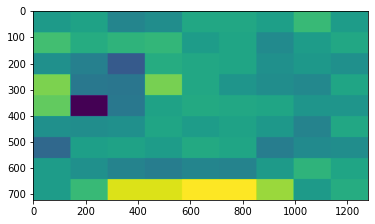

In [78]:
plt.imshow(diff)